### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading companies data from input csv

In [2]:
df_comp = pd.read_csv('./input_data/companyInput.csv')  

df_comp.head(3)

,Founded_Year,Organization Name,Funding Status,Last_Funding_Year,Last Funding Type
0,2014,Heliocor,Seed,2018.0,Pre-Seed
1,2017,Oriente,Early Stage Venture,2018.0,Series A
2,2015,Lemonade,Late Stage Venture,2017.0,Series C


### 2. Year on Year - No. of Companies Founded

#### Extracting number of companies  founded each year for the period 2008-18

In [3]:
# Genarating count of companies founded each year from 2008-18

founded_ser=df_comp['Founded_Year'].value_counts()

# Creating DataFrame with YoY  number of companies Founded

founded_df = pd.DataFrame({'Founded':founded_ser})

founded_df.index.name='Year'

founded_df.reset_index(level=0, drop=False, inplace=True)

In [4]:
founded_df.head(3)

,Year,Founded
0,2016,135
1,2017,121
2,2015,105


### 3. Plotting  Trend YoY  No. of Companies Founded 

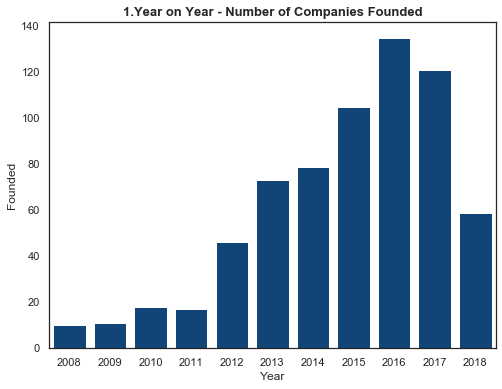

In [5]:
#Plotting Trends

plotTitle = '1.Year on Year - Number of Companies Founded'

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax = plt.subplots(figsize=(8,6))

plt.xticks(np.arange(start=2008, stop=2019, step=1))

ax.set_title(plotTitle,fontdict={'fontsize':13,'fontweight':'bold'})

ax.set_xlabel('Year')

sns.barplot(x=founded_df['Year'],
            y=founded_df['Founded'], 
            color='#004488',
            ax=ax)

sns.set()

# Saving plot to output .png file

plt.savefig('./output/plots/1_YoY-Founded.png', dpi=100)

### 4. Saving results to file

In [6]:
# Creating outputData excel file and writing data to it

writer =  pd.ExcelWriter('./output/outputData.xlsx')  

founded_df.to_excel(writer, sheet_name='1.YoY_Founded', index=False)

writer.save()

### 5. Deleting dataframes, series to deallocate memory

In [7]:
del df_comp
del founded_ser
del founded_df